# Load dataset

In [1]:
import pandas as pd
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area','Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('https://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep="\t", usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [2]:
df.shape

(2930, 6)

In [3]:
df['Central Air'] = df['Central Air'].map({'Y': 1, 'N': 0})

In [4]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

# EDA

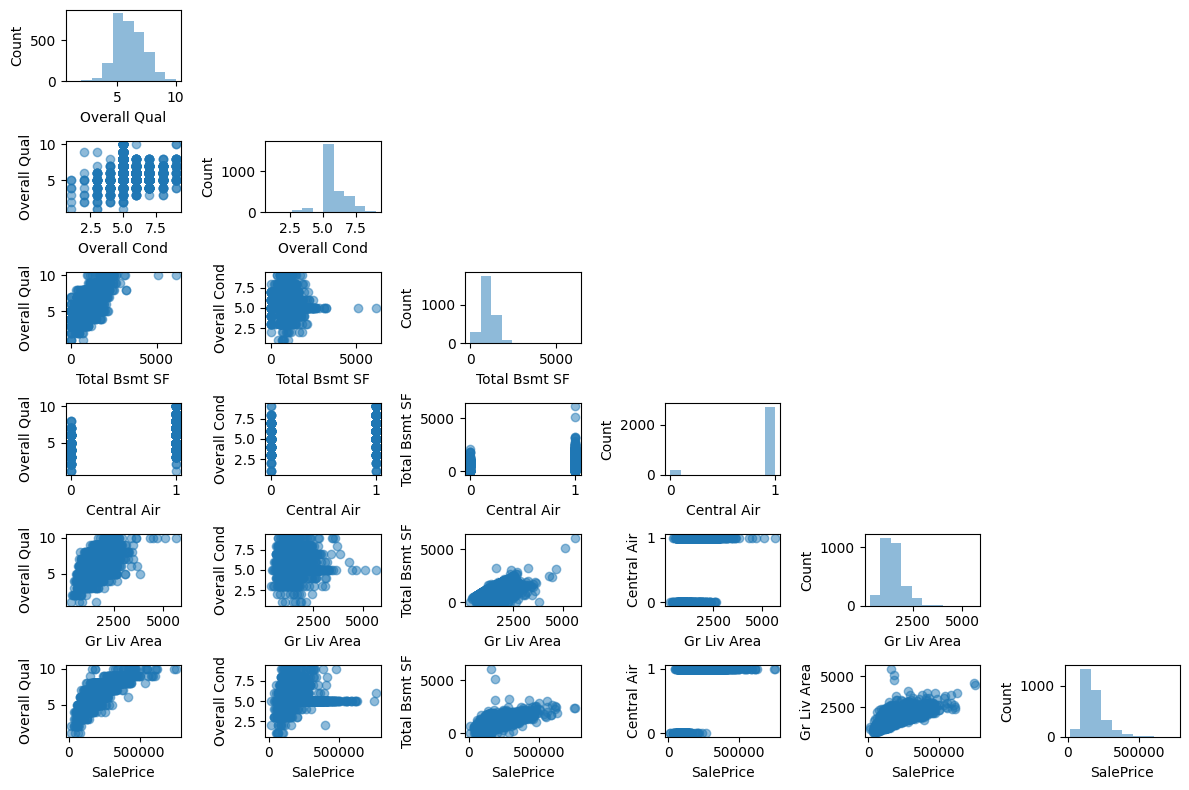

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

scatterplotmatrix(df.values, figsize=(12, 8), names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()



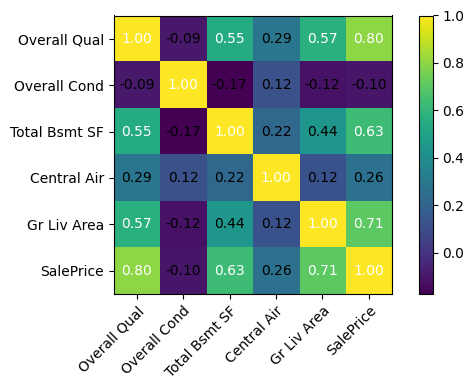

In [9]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns, figsize=(6, 4))
plt.tight_layout()
plt.show()

# Linear Regression

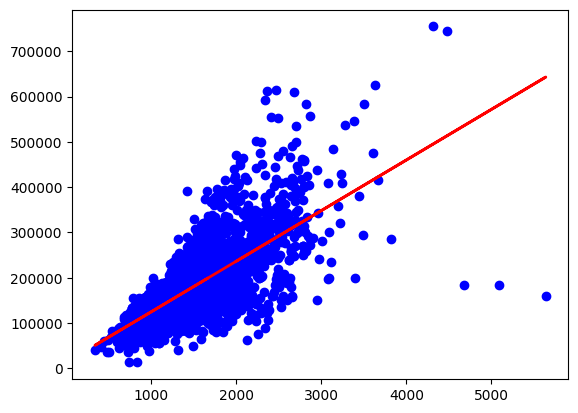

In [10]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

def linreg_plot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return None

linreg_plot(X, y, lr)

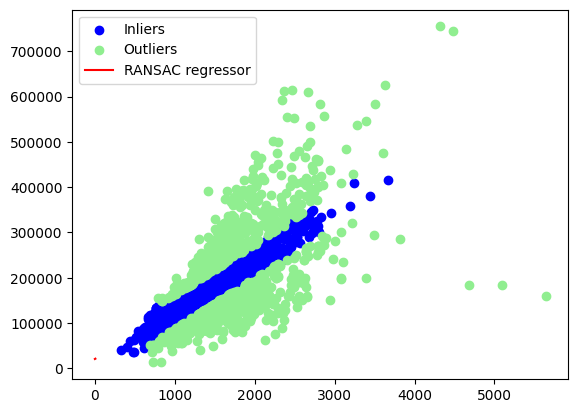

In [11]:
# implement ransac regressor

from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=0.95, residual_threshold=None, random_state=123)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red', label='RANSAC regressor')
plt.legend(loc='upper left')
plt.show()

# Evaluation

In [13]:
from sklearn.model_selection import train_test_split
target = 'SalePrice'
features = df.columns[df.columns != 'SalePrice']

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)


In [14]:
# calculate MSE 

from sklearn.metrics import mean_squared_error
import numpy as np
mse_train = mean_squared_error(y_train, y_train_pred)
mes_test = mean_squared_error(y_test, y_test_pred)

In [16]:
print(mse_train)
print(mes_test)

1583809579.5095363
1174304406.6391675


In [17]:
# calculate MAE

from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(mae_train)
print(mae_test)

26149.64288191982
24036.34286524751


This means the model makes an error of $25,000 on average.

# Regularization

In [18]:
# define ridge, lasso,  elasticnet regulariers
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Polynomial regression

In [19]:
# remove outliers with living areag > 4000

df_new = df[df['Gr Liv Area'] < 4000]
X = df_new[['Gr Liv Area']].values
y = df_new['SalePrice'].values

Degree 1:
MSE: 2976313405.6842356
R-squared: 0.5174078398002504
Degree 2:
MSE: 2975092829.0824795
R-squared: 0.5176057493005759
Degree 3:
MSE: 2974272634.406531
R-squared: 0.5177387391663926


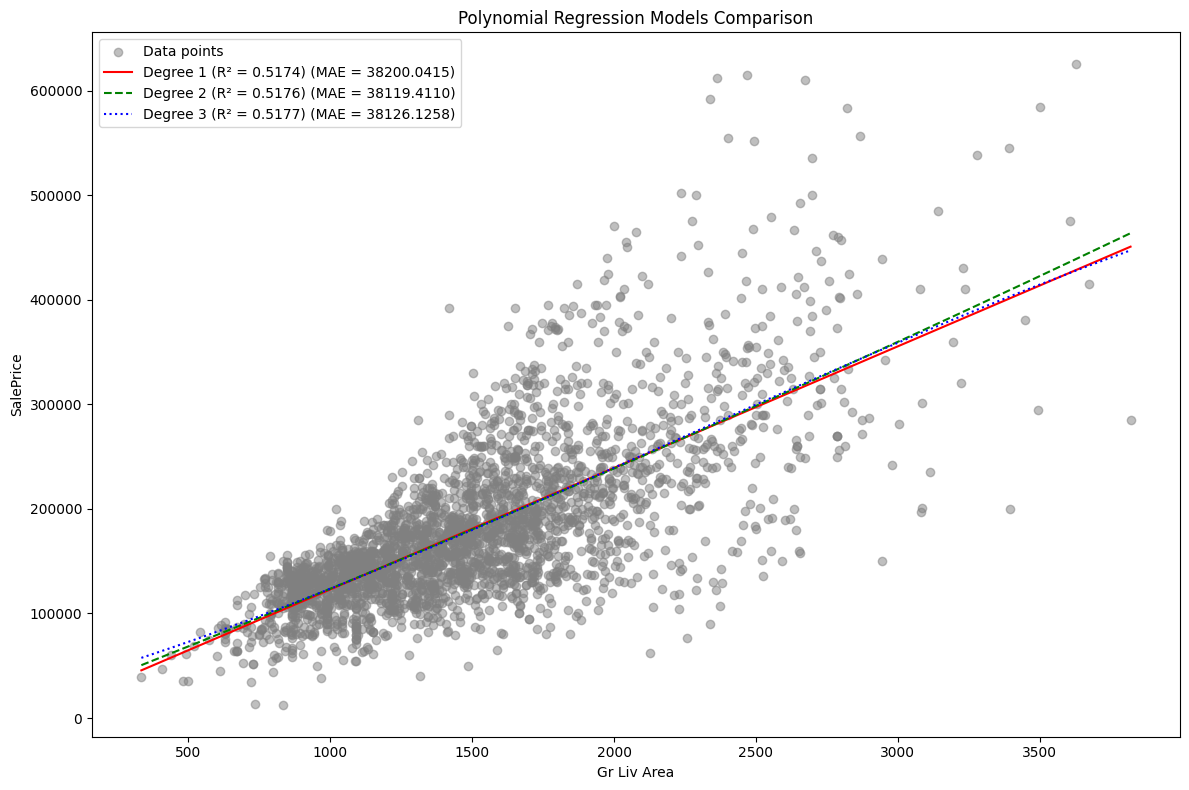

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are already defined as per your last code snippet
X = df_new[['Gr Liv Area']].values
y = df_new['SalePrice'].values

def linreg_plot(X, y, model):
# Create polynomial features
    degrees = [1, 2, 3]
    colors = ['red', 'green', 'blue']
    line_styles = ['-', '--', ':']

    plt.figure(figsize=(12, 8))
    plt.scatter(X, y, color='gray', alpha=0.5, label='Data points')

    for degree, color, line_style in zip(degrees, colors, line_styles):
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly_features.fit_transform(X)

        # Fit the model
        model = LinearRegression()
        model.fit(X_poly, y)

        # Make predictions
        y_pred = model.predict(X_poly)

        # Calculate MSE and R-squared
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        mae = mean_absolute_error(y, y_pred)

        print(f"Degree {degree}:")
        print(f"MSE: {mse}")
        print(f"R-squared: {r2}")

        # Sort X for smooth line plot
        X_sorted = np.sort(X, axis=0)
        X_poly_sorted = poly_features.transform(X_sorted)
        y_poly_pred = model.predict(X_poly_sorted)
        
        plt.plot(X_sorted, y_poly_pred, color=color, linestyle=line_style, 
                label=f'Degree {degree} (R² = {r2:.4f}) (MAE = {mae:.4f})')

    plt.xlabel('Gr Liv Area')
    plt.ylabel('SalePrice')
    plt.title('Polynomial Regression Models Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()
linreg_plot(X, y)

Degree 1:
MSE: 2169627879.613187
R-squared: 0.6482072743910445
Degree 2:
MSE: 1825768380.9341576
R-squared: 0.7039621212952019
Degree 3:
MSE: 1775162606.4196012
R-squared: 0.7121675575892829


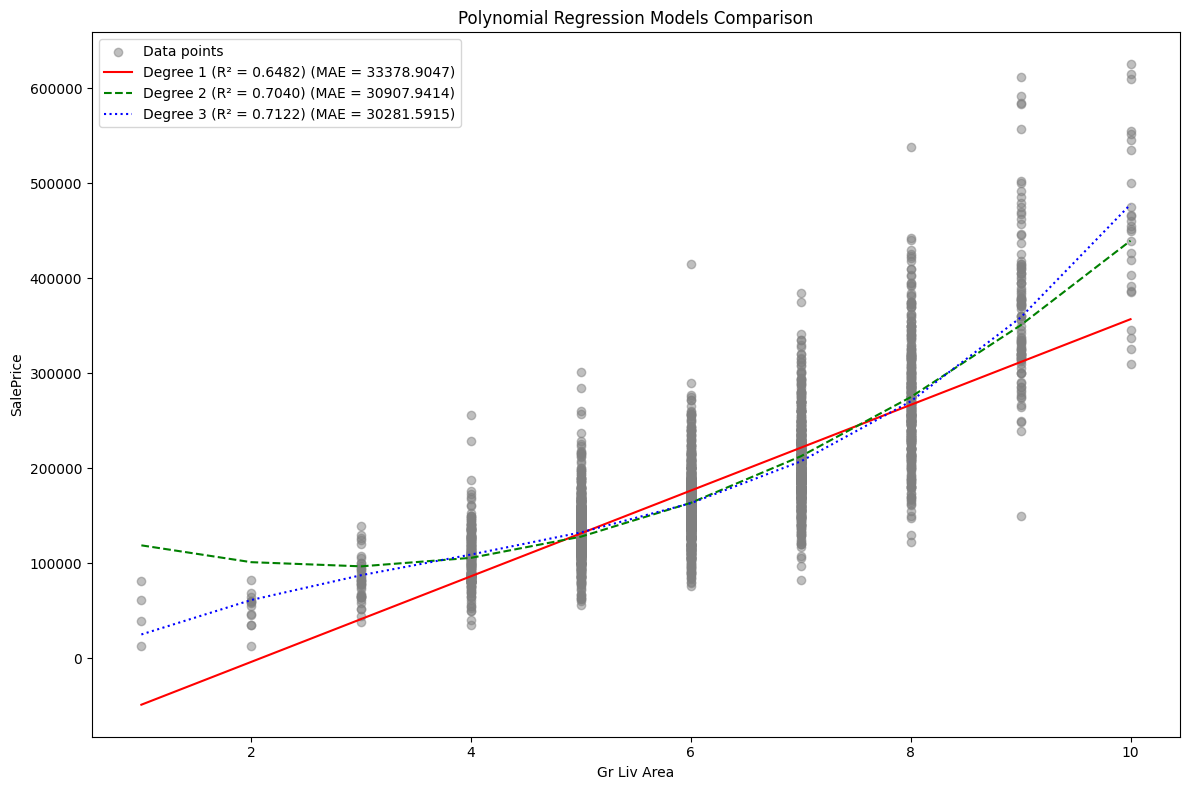

In [29]:
X = df_new[['Overall Qual']].values
y = df_new['SalePrice'].values

linreg_plot(X, y)

# Random forests for nonlinear relationships

In [35]:
def fit_and_plot_model(X, y, model, model_name):
    # Fit the model
    model.fit(X, y)
    
    # Make predictions
    y_pred = model.predict(X)
    
    # Calculate metrics
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='gray', alpha=0.5, label='Data points')
    
    # Sort X for smooth line plot
    X_sorted = np.sort(X, axis=0)
    y_pred_sorted = model.predict(X_sorted)
    
    plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, 
             label=f'{model_name} ')
    
    plt.xlabel('Gr Liv Area')
    plt.ylabel('SalePrice')
    plt.title(f'{model_name} Regression Model')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"{model_name} Results:")

# Example usage:
# lr_model = LinearRegression()
# fit_and_plot_model(X, y, lr_model, "Linear Regression")

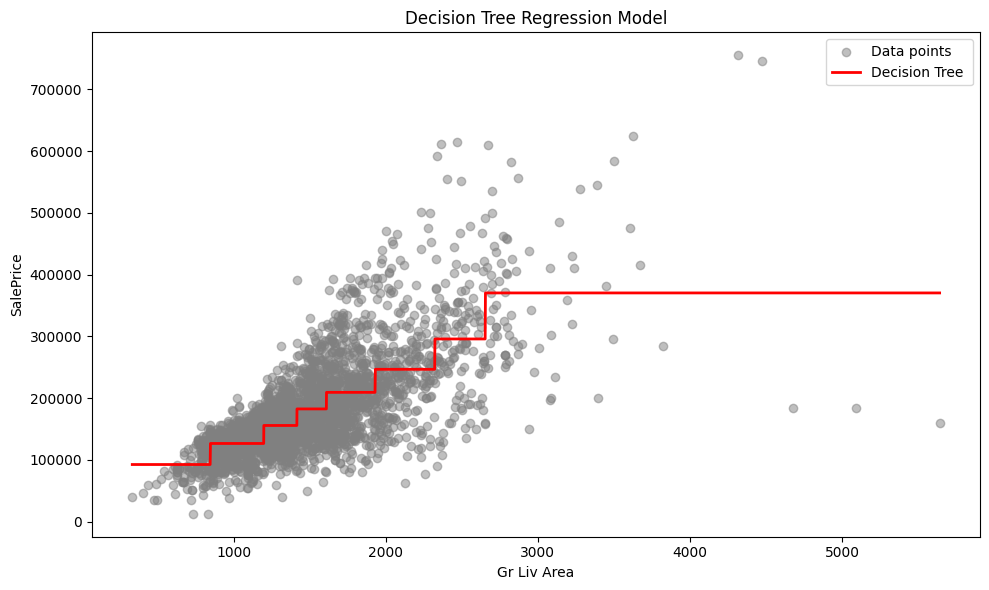

Decision Tree Results:


In [36]:
from sklearn.tree import DecisionTreeRegressor
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

fit_and_plot_model(X, y, tree, "Decision Tree")

Random Forest Regressor Results:
Train MSE: 177795881.68
Test MSE: 980835388.71
Train R-squared: 0.9710
Test R-squared: 0.8591
Train MAE: 8459.37
Test MAE: 21054.37


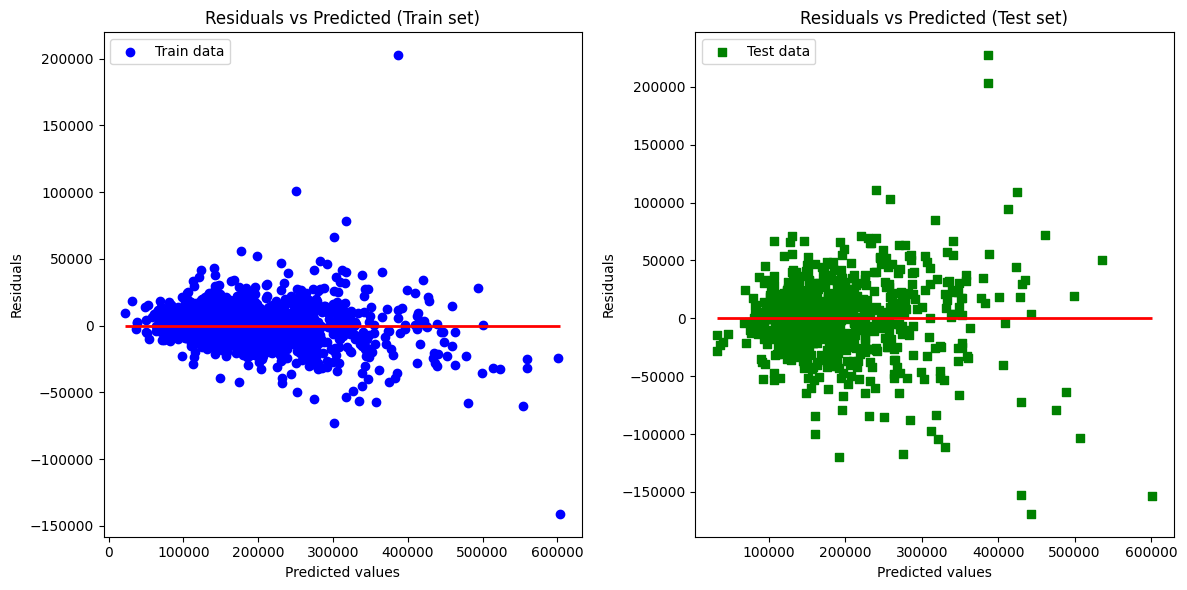

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
X = df[features].values
y = df[target].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Random Forest Regressor Results:")
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Train R-squared: {train_r2:.4f}")
print(f"Test R-squared: {test_r2:.4f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

# Function to plot residuals vs predicted values
def plot_residuals(y_train, y_train_pred, y_test, y_test_pred):
    plt.figure(figsize=(12, 6))
    
    # Train set
    plt.subplot(1, 2, 1)
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Train data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), color='red', lw=2)
    plt.title('Residuals vs Predicted (Train set)')
    
    # Test set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), color='red', lw=2)
    plt.title('Residuals vs Predicted (Test set)')
    
    plt.tight_layout()
    plt.show()

# Plot residuals vs predicted values
plot_residuals(y_train, y_train_pred, y_test, y_test_pred)

Model seems to overfit because there are more outliers in the test set.